# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


/Users/Ryosuke/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

In [2]:
city_data.feature_names[0:13]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

/Users/Ryosuke/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/Ryosuke/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


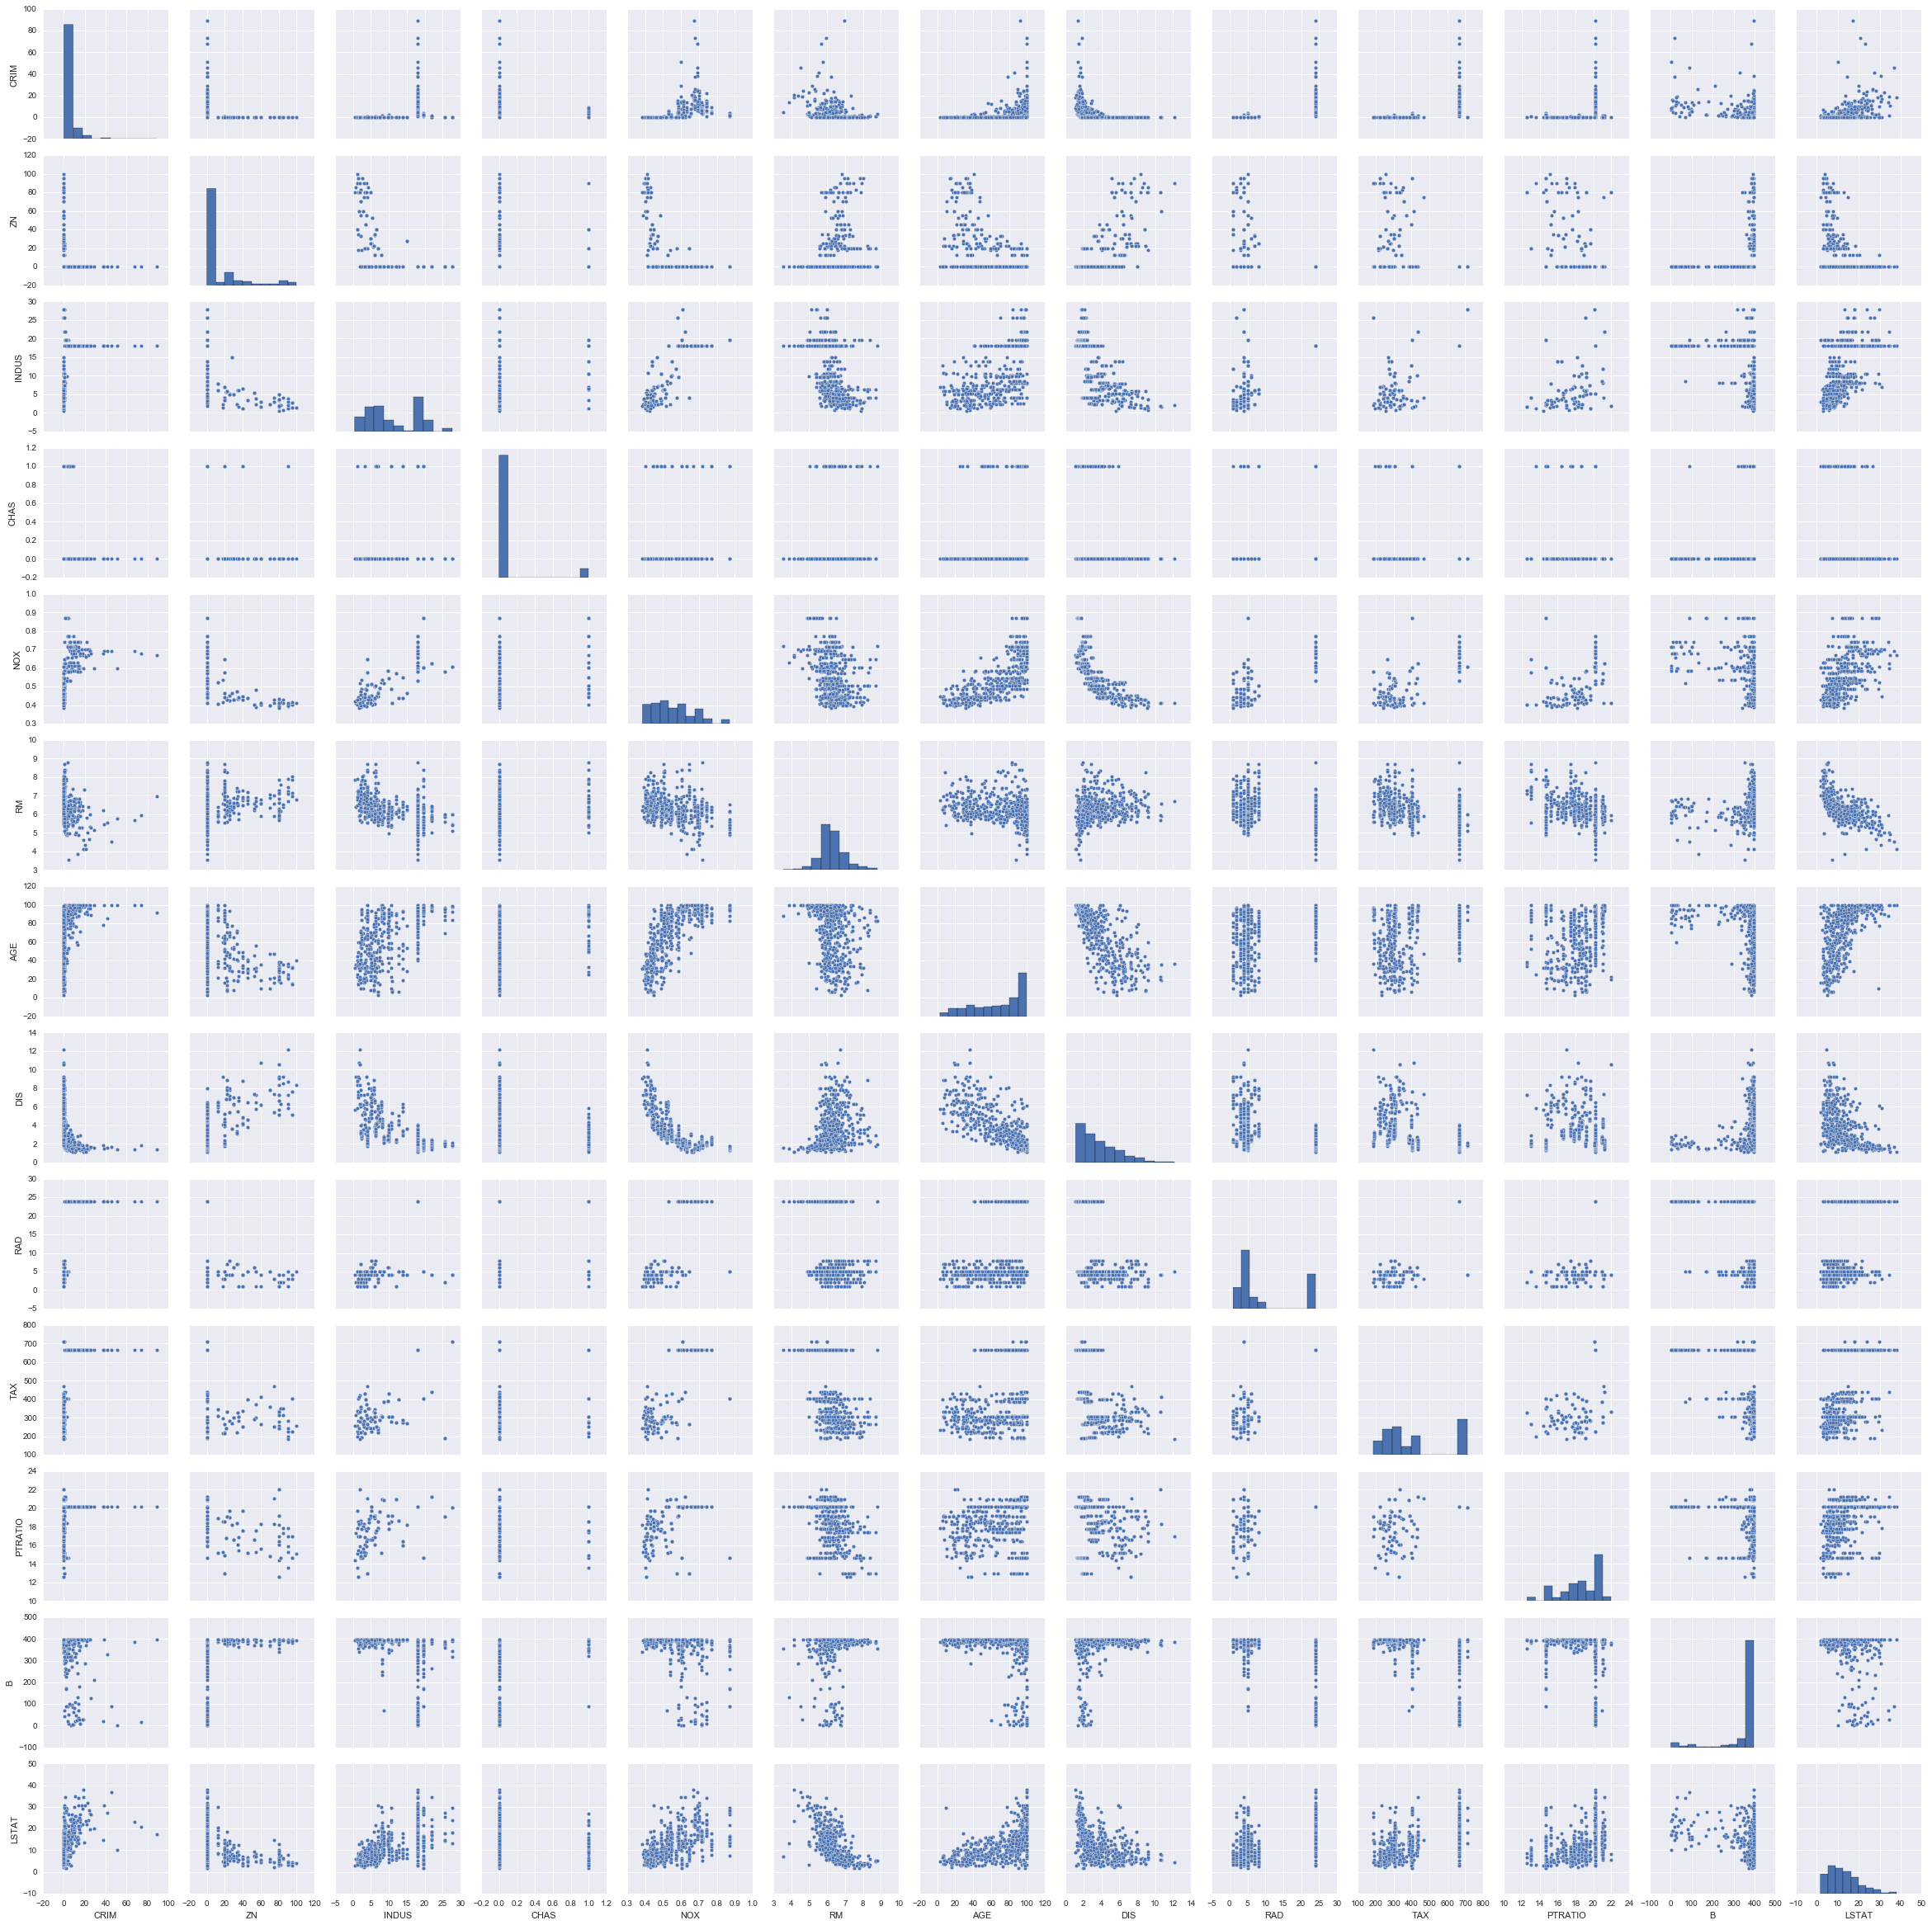

In [3]:
import seaborn as sns
import pandas as pd
city_data_df=pd.DataFrame(city_data.data,columns=city_data.feature_names[0:13])
city_data_df.head()
sns.pairplot(city_data_df)

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [4]:
# Number of houses in the dataset
total_houses = city_data.data.shape[0]

# Number of features in the dataset
total_features = city_data.data.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = housing_prices.std()

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

In [5]:
#CRIM: per capita crime rate by town
city_data.data[:,0].min(),city_data.data[:,0].max(),city_data.data[:,0].mean(),np.median(city_data.data[:,0])

(0.0063200000000000001,
 88.976200000000006,
 3.5937607114624512,
 0.25651000000000002)

In [6]:
city_data.data[:,5].min(),city_data.data[:,5].max(),city_data.data[:,5].mean(),np.median(city_data.data[:,5])

(3.5609999999999999,
 8.7799999999999994,
 6.2846343873517787,
 6.2084999999999999)

In [7]:
city_data.data[:,10].min(),city_data.data[:,10].max(),city_data.data[:,10].mean(),np.median(city_data.data[:,10])

(12.6, 22.0, 18.455533596837945, 19.050000000000001)

**Answer: **
I chose CRIM,RM,PTRATIO as the features. Description is below<br>
CRIM: per capita crime rate by town<br>
People want to live in the safe area and the area will be popular. That's why, I think the selling price and CRIM are corelated.<br>
CRIM:[Minimum:0.00632,Maximum:88.976,Mean:3.594,Median:0.25651]<br>

RM: average number of rooms per dwelling <br>
The more rooms the house has, the more expensive the house will be.<br>
RM:[Minimum:3.561,Maximum:8.780,Mean:6.285,Median:6.208]<br>

PTRATIO: pupil-teacher ratio by town <br>
Those who have small childeren want to live near the school for convenience. So, the selling price and PTRATIO are somehow corelated.<br> 
PTRATIO:[Minimum:12.6,Maximum:22.0,Mean:18.456,Median:19.050]

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [8]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [9]:
print [CLIENT_FEATURES[0][0],CLIENT_FEATURES[0][5],CLIENT_FEATURES[0][10]]

[11.95, 5.609, 20.2]


In [10]:
city_data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Answer: **

CRIM:11.95<br>
RM:5.609<br>
PTRATIO:20.2

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [11]:
len(housing_prices)*0.7

354.2

In [12]:
int(round(len(housing_features)*0.7))

354

In [13]:
len(housing_features)*0.3

151.79999999999998

In [14]:
int(round(len(housing_features)*0.3))

152

In [15]:
len(housing_features)

506

In [16]:
len(housing_features)-int(round(len(housing_features)*0.7))

152

In [34]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    (X_train,X_test,y_train,y_test)=train_test_split(X, y, test_size=0.3, random_state=42)
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** Splitting the data into training and testing subset is needed when we want to evaluate the model performance.If we don't split the data into two and try to evaluate the model, we will get high accuracy.However the model is very vulnerable when the new data comes in.(This is called overfitting).Therefore, we need to split the data to avoid overfitting.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [19]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    
    error = mean_squared_error(y_true, y_predict)
    print error
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."


0.0
Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **　When predicting housing prices, the output will be number. So accuracy, precision,recall,f1 score which are used by categorical values are not appropriate. Therefore Mean Squared Error(MSE) and Mean Absolute Error(MAE) will be the best choice.
Mean Absolute Error is easy to recognize since the value is just the difference between the real value and predicted value.On the other hand, Mean Squared Error is a bit hard to recognize the value at glance since the value is squared. As for MSE, the value is quite sensitive to the error.(e.g. if the error is 0.1(small), MSE is 0.01(even smaller). But if the error is 100(large), MSE is 10000(larger).) In this dataset, I will use MSE because MSE is sensitive to the outliers.  Outliers significantly affect the result, so MSE is the best performance metric.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [38]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function =  make_scorer(mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters,scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **Grid search algorithm is to search every parameter which we set and return the best result.

When we make predictive models, we have to tune the parameters to get better scores. If the number of parameters is small, it is possible to try every parameter.However, in most cases, the parameters we have to tune are many.Grid search will help in this situation. It will search every parameter and return the best outcome.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross-validation is the method to maximize the splitting data.By using cross-validation we can make the most of the training data. That helps reduce the error on the test data. Especially, cross-validation is useful when the data is not large enough or the distribution of data isn't good.<br>

There are several ways of cross validation, but I'll discuss how the k-fold cross validation works in a model.<br>
The original sample is randomly partitioned into k equal sized subsamples. (k-1) subsamples are used as training data and the remining 1 is used as testing data. The process is done k times with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. 

Grid search itself is useful to try many parameters(for example, C,kernel,gamma for Support Vector Classifier).<br>
When we use cross-validation with grid search, we can maximize the use of train and test data(reducing error) and find the best parameter.Therefore, cross-validation is helpful when using grid search because we can minimize the error and get the best performance at the same time.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [45]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()


In [46]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .
0.0
92.5178947368
13.5685416667
120.765902778
33.2456969697
109.489042518
43.710320911
134.955758481
52.6792839506
135.442984983
50.9563328034
136.83582357
57.834724026
132.487042495
58.7998431373
124.126057895
59.1918252934
124.96744005
56.976558908
124.522927138
56.4647478925
123.129049995
60.4244214286
120.629585285
62.9912271077
111.684843394
65.0001346894
104.770134018
68.2501382887
104.679731334
68.3069806857
100.929489547
77.5687743257
97.6750785978
82.6289491117
96.0416475345
88.8744437376
97.5138197152
86.5526317379
97.2772761862
84.8339883908
96.2975601623
83.4587091228
95.1395932642
83.1821706686
95.4713189652
81.3652167392
94.1422675996
81.4633556027
95.3590578341
80.980783961
94.3477784187
80.7058466312
94.7707054094
82.931820623
92.8956269427
81.3773172527
95.6737921299
82.3525943122
95.3477105304
83.9933245329
95.4555046229
82.9332017299
95.2233081055
84.6417755298
90.4058007877
84.5723807983
95.335705

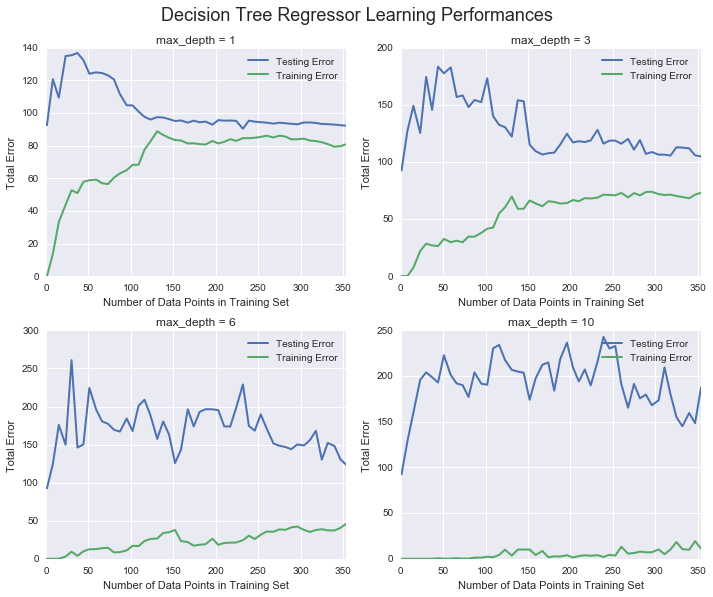

In [47]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **  
The max depth I have chosen is 1.
As the size of the training set increases, the training error increases rapidly. On the other hand, as the size of testing set increases, the testing error decreases.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** 
max dept of 1: When the  model is using the full training set, the error between testing error and training error is small. That means the model suffers from high-bias. As the number of data points in training set increases, the training error and testing error converge into, but they converge into high error. This is because of underfitting

max depth of 10: When the  model is using the full training set, the error between testing error and training error is large. That means the model suffers from high-variance. When the number of data points in training set increases, training error doesn't change so much, but the testing error goes up at first and then oscillate(never converge).This is because of overfitting.

Creating a model complexity graph. . . 
80.8562724375
92.261449722
77.5040131808
97.072447641
73.0418089197
108.397794965
64.7406474074
115.726001018
54.5665424138
119.398338024
46.2963696874
133.595858174
37.6350169336
153.182584665
26.8060598805
162.788247675
17.9754592776
161.695903547
11.0656678979
189.822934361
7.32307098934
177.79856912
3.78588730251
198.204170506
1.74975096404
198.0923286


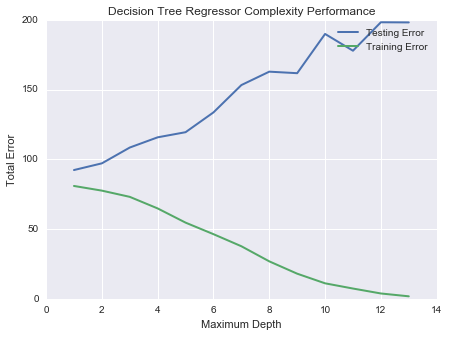

In [42]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
The error of training error and test error is around 80 when the maximum depth is small(around 1). But when the number of the maximum depth increases, the training error decreases and the test error increases.
When the number of maximum depth is small, the defference between testing error and training error is also small. As the number increases, the diffrence becomes large. That means the model is suffering from high variance. We shouldn't choose the high error between testing error and training error.

The difference between the testing and training error grows up as the number of maximum depth increases. Therefore, we should choose the minimum difference one. That is maximum depth is 1.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [51]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 1


**Answer: ** Final model has an optimal max_depth parameter of 1

The optimal max_depth for this model is 1. This is not my initial intuition. I first think that max depth 1 is overly simplified and lead to under-fitting.

# Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [52]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 24.327


**Answer: ** Predicted value of client's home: 22.327
The selling price calculated from statistics is below.

Mean house price: 22.533
Median house price: 21.2

The predicted value of client's home is between mean and median house price.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **  The data contains many outliers so the result is somehow affected by those values. To prevent the effect of outliers, we used all features in this model. However putting all features in the predicive model is not good idea to build optimal model.Some features are correlated with each other and these values should be removed by PCA. Therefoe, I don't use this model to predict the selling perice.